In [1]:
import pandas as pd
import numpy as np
import time as t
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
dataframe_project = pd.read_csv(r"C:\Users\DELL\Downloads\patches_gabor_15816_1.csv")
dataframe_project

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,1607984,590161,30393367,30586929,30908212,3557712,1621138,652953,29941573,...,42706367,21992566,62263734,65066148,249147,40622791,42675142,21954827,62367472,good
1,MaI286_256.jpg_0_0.png,2409410,643821,28341070,27499264,28892467,3982411,2402321,644235,27960356,...,45782802,23562865,61063851,64309685,252989,43541072,45761590,23541111,61161404,good
2,MaI286_256.jpg_0_2.png,1244326,369812,30907068,27466105,28429032,2831793,1252555,602900,30921587,...,45316007,23315932,63392361,65690131,257766,43109193,45296517,23293852,63474181,good
3,MaI286_256.jpg_0_3.png,1631795,557097,30301489,29490085,29306020,4807170,1644043,1057676,29838689,...,41933519,21616534,60989696,65434755,472186,40035467,41888839,21567725,61148415,good
4,MaI286_258.jpg_0_0.png,984212,433434,29948438,30600901,31128474,2724761,979870,374437,30769862,...,43313769,22282942,63965827,66146550,137173,41167720,43298158,22265049,64010694,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,1148726,301551,24516974,27216360,30997331,8563063,1133933,291160,24664964,...,36116804,18562491,61832379,65723007,65218,34301160,36116430,18561987,61803126,bad
4306,MaI843_048_0_1.png,645854,234329,29333027,29946293,31494284,6389616,634937,464582,29331611,...,40270695,20714888,62239700,66517727,119120,38264591,40266947,20706356,62337197,bad
4307,MaI843_048_0_0.png,3120475,666772,29133067,29819972,30353781,5961931,3086075,357274,29495865,...,38812330,19959629,59041573,62365063,74478,36842285,38809960,19953819,59094463,bad
4308,MaI843_047_0_8.png,1277520,612085,24686619,27101002,30589675,10843015,1271576,646650,25356419,...,35144094,18084309,60155871,66228896,176590,33418317,35146446,18088530,60149050,bad


In [3]:
from sklearn import preprocessing as prep
label_encoder = prep.LabelEncoder()
dataframe_project['class'] = label_encoder.fit_transform(dataframe_project['class'])
dataframe_project

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,1607984,590161,30393367,30586929,30908212,3557712,1621138,652953,29941573,...,42706367,21992566,62263734,65066148,249147,40622791,42675142,21954827,62367472,1
1,MaI286_256.jpg_0_0.png,2409410,643821,28341070,27499264,28892467,3982411,2402321,644235,27960356,...,45782802,23562865,61063851,64309685,252989,43541072,45761590,23541111,61161404,1
2,MaI286_256.jpg_0_2.png,1244326,369812,30907068,27466105,28429032,2831793,1252555,602900,30921587,...,45316007,23315932,63392361,65690131,257766,43109193,45296517,23293852,63474181,1
3,MaI286_256.jpg_0_3.png,1631795,557097,30301489,29490085,29306020,4807170,1644043,1057676,29838689,...,41933519,21616534,60989696,65434755,472186,40035467,41888839,21567725,61148415,1
4,MaI286_258.jpg_0_0.png,984212,433434,29948438,30600901,31128474,2724761,979870,374437,30769862,...,43313769,22282942,63965827,66146550,137173,41167720,43298158,22265049,64010694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,1148726,301551,24516974,27216360,30997331,8563063,1133933,291160,24664964,...,36116804,18562491,61832379,65723007,65218,34301160,36116430,18561987,61803126,0
4306,MaI843_048_0_1.png,645854,234329,29333027,29946293,31494284,6389616,634937,464582,29331611,...,40270695,20714888,62239700,66517727,119120,38264591,40266947,20706356,62337197,0
4307,MaI843_048_0_0.png,3120475,666772,29133067,29819972,30353781,5961931,3086075,357274,29495865,...,38812330,19959629,59041573,62365063,74478,36842285,38809960,19953819,59094463,0
4308,MaI843_047_0_8.png,1277520,612085,24686619,27101002,30589675,10843015,1271576,646650,25356419,...,35144094,18084309,60155871,66228896,176590,33418317,35146446,18088530,60149050,0


In [4]:
normal_scaler = prep.StandardScaler()
scaled_columns = dataframe_project.columns[1:25]
scaled_df = dataframe_project
for col in scaled_columns:
    scaled_df[col] = normal_scaler.fit_transform(scaled_df[col].values.reshape(-1, 1))
scaled_df

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,0.206364,1.137685,1.050212,0.961044,0.666561,-0.787215,0.215413,1.248537,0.990115,...,1.077631,1.082246,0.726466,0.556098,1.807526,1.081326,1.075729,1.077680,0.730857,1
1,MaI286_256.jpg_0_0.png,0.817664,1.323767,0.853097,0.674644,0.497735,-0.743263,0.810270,1.219416,0.800269,...,1.286252,1.289359,0.676086,0.527098,1.847232,1.289622,1.285047,1.286934,0.680215,1
2,MaI286_256.jpg_0_2.png,-0.071022,0.373560,1.099551,0.671568,0.458921,-0.862340,-0.065256,1.081344,1.084022,...,1.254597,1.256790,0.773855,0.580019,1.896600,1.258796,1.253507,1.254317,0.777327,1
3,MaI286_256.jpg_0_3.png,0.224526,1.023026,1.041387,0.859305,0.532372,-0.657909,0.232855,2.600439,0.980256,...,1.025223,1.032650,0.672973,0.570229,4.112539,1.039405,1.022403,1.026616,0.679669,1
4,MaI286_258.jpg_0_0.png,-0.269428,0.594188,1.007478,0.962340,0.685009,-0.873417,-0.272901,0.318206,1.069484,...,1.118821,1.120545,0.797933,0.597516,0.650323,1.120221,1.117981,1.118603,0.799854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.136845,0.485807,0.648403,0.674025,-0.269214,-0.155585,0.040035,0.484496,...,0.630777,0.629839,0.708355,0.581279,-0.093301,0.630111,0.630928,0.630116,0.707160,0
4306,MaI843_048_0_1.png,-0.527516,-0.096267,0.948370,0.901621,0.715647,-0.494143,-0.535561,0.619319,0.931666,...,0.912462,0.913728,0.725457,0.611745,0.463753,0.913006,0.912409,0.912989,0.729585,0
4307,MaI843_048_0_0.png,1.360040,1.403357,0.929165,0.889904,0.620126,-0.538403,1.330936,0.260876,0.947406,...,0.813567,0.814113,0.591175,0.452550,0.002397,0.811487,0.813599,0.813718,0.593426,0
4308,MaI843_047_0_8.png,-0.045703,1.213713,0.502100,0.637703,0.639883,-0.033262,-0.050772,1.227483,0.550753,...,0.564815,0.566770,0.637962,0.600673,1.057681,0.567096,0.565145,0.567660,0.637707,0


In [5]:
dataframe_scaled_input = scaled_df.iloc[:, 1:25]
dataframe_scaled_output = scaled_df.iloc[:, 25]
scaled_input_train, scaled_input_test, scaled_output_train, scaled_output_test = train_test_split(dataframe_scaled_input, dataframe_scaled_output, test_size=0.3, random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(scaled_input_train, scaled_output_train.ravel())

In [7]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colName=corr_matrix.columns[i]
                col_corr.add(colName)
    return col_corr
col=correlation(input_train_res,0.95)
print('Correlated columns:',col)
print(len(col))

Correlated columns: {'MeanAmplitude_0_1', 'LocalEnergy_1.5707963267948966_1', 'LocalEnergy_1.5707963267948966_3', 'MeanAmplitude_0.7853981633974483_1', 'LocalEnergy_2.356194490192345_1', 'MeanAmplitude_0_3', 'MeanAmplitude_0_2', 'LocalEnergy_0.7853981633974483_1', 'MeanAmplitude_1.5707963267948966_3', 'MeanAmplitude_2.356194490192345_2', 'MeanAmplitude_1.5707963267948966_2', 'MeanAmplitude_2.356194490192345_3', 'MeanAmplitude_1.5707963267948966_1', 'LocalEnergy_0.7853981633974483_2', 'LocalEnergy_2.356194490192345_2', 'MeanAmplitude_0.7853981633974483_2', 'LocalEnergy_2.356194490192345_3', 'MeanAmplitude_2.356194490192345_1', 'MeanAmplitude_0.7853981633974483_3'}
19


In [8]:
dataframe_project_reduced = dataframe_project.drop(columns=['LocalEnergy_1.5707963267948966_1', 'LocalEnergy_0.7853981633974483_2', 'MeanAmplitude_2.356194490192345_1', 'MeanAmplitude_0.7853981633974483_2', 'LocalEnergy_0.7853981633974483_1', 'MeanAmplitude_2.356194490192345_2', 'MeanAmplitude_1.5707963267948966_3', 'MeanAmplitude_0_3', 'MeanAmplitude_2.356194490192345_3', 'LocalEnergy_1.5707963267948966_3', 'MeanAmplitude_0_2', 'LocalEnergy_2.356194490192345_3', 'LocalEnergy_2.356194490192345_2', 'MeanAmplitude_0_1', 'MeanAmplitude_0.7853981633974483_1', 'LocalEnergy_2.356194490192345_1', 'MeanAmplitude_1.5707963267948966_2', 'MeanAmplitude_0.7853981633974483_3'])
dataframe_project_reduced

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_1,class
0,MaI286_255.jpg_0_0.png,0.206364,1.137685,1.050212,-0.787215,1.248537,0.556098,1
1,MaI286_256.jpg_0_0.png,0.817664,1.323767,0.853097,-0.743263,1.219416,0.527098,1
2,MaI286_256.jpg_0_2.png,-0.071022,0.373560,1.099551,-0.862340,1.081344,0.580019,1
3,MaI286_256.jpg_0_3.png,0.224526,1.023026,1.041387,-0.657909,2.600439,0.570229,1
4,MaI286_258.jpg_0_0.png,-0.269428,0.594188,1.007478,-0.873417,0.318206,0.597516,1
...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.136845,0.485807,-0.269214,0.040035,0.581279,0
4306,MaI843_048_0_1.png,-0.527516,-0.096267,0.948370,-0.494143,0.619319,0.611745,0
4307,MaI843_048_0_0.png,1.360040,1.403357,0.929165,-0.538403,0.260876,0.452550,0
4308,MaI843_047_0_8.png,-0.045703,1.213713,0.502100,-0.033262,1.227483,0.600673,0


In [9]:
dataframe_scaled_input = dataframe_project_reduced.iloc[:, 1:7]
dataframe_scaled_output = dataframe_project_reduced.iloc[:, 7]
scaled_input_train, scaled_input_test, scaled_output_train, scaled_output_test = train_test_split(dataframe_scaled_input, dataframe_scaled_output, test_size=0.3, random_state=42)

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(scaled_input_train, scaled_output_train.ravel())
print(output_train_res)

[0 1 0 ... 2 2 2]


<Axes: >

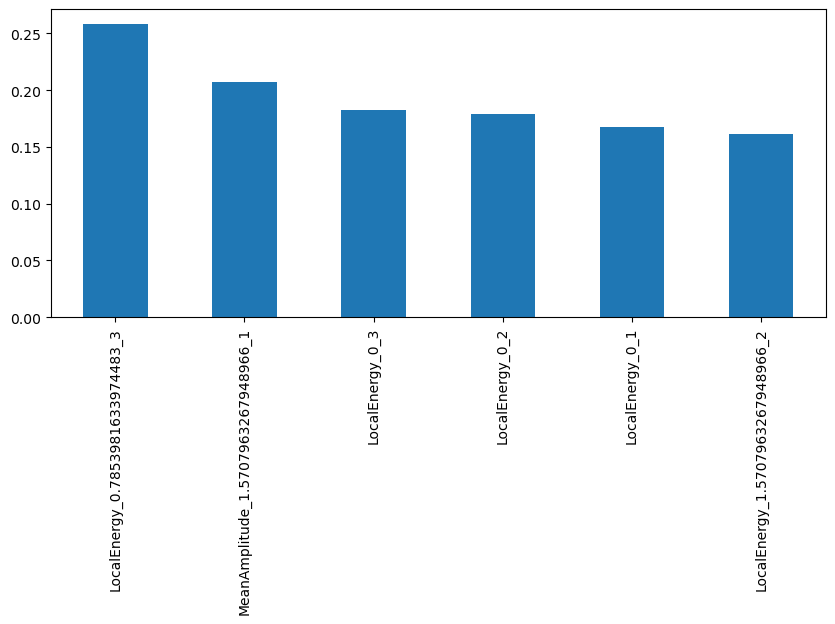

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

mi1 = mutual_info_classif(input_train_res, output_train_res)
mi1 = pd.Series(mi1)
mi1.index = input_train_res.columns
mi1.sort_values(ascending=False)
mi1.sort_values(ascending=False).plot.bar(figsize=(10, 4))
mi1_sorted = mi1.sort_values(ascending=False)

# Plot the sorted values only if the value is greater than 0
mi1_sorted[mi1_sorted > 0].plot.bar(figsize=(10, 4))

In [12]:
dataframe_final = dataframe_project_reduced.drop(columns=['LocalEnergy_0_2'])
dataframe_final

,ImageName,LocalEnergy_0_1,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_1,class
0,MaI286_255.jpg_0_0.png,0.206364,1.050212,-0.787215,1.248537,0.556098,1
1,MaI286_256.jpg_0_0.png,0.817664,0.853097,-0.743263,1.219416,0.527098,1
2,MaI286_256.jpg_0_2.png,-0.071022,1.099551,-0.862340,1.081344,0.580019,1
3,MaI286_256.jpg_0_3.png,0.224526,1.041387,-0.657909,2.600439,0.570229,1
4,MaI286_258.jpg_0_0.png,-0.269428,1.007478,-0.873417,0.318206,0.597516,1
...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.485807,-0.269214,0.040035,0.581279,0
4306,MaI843_048_0_1.png,-0.527516,0.948370,-0.494143,0.619319,0.611745,0
4307,MaI843_048_0_0.png,1.360040,0.929165,-0.538403,0.260876,0.452550,0
4308,MaI843_047_0_8.png,-0.045703,0.502100,-0.033262,1.227483,0.600673,0


In [13]:
input_final = dataframe_final.iloc[:, 1:6]
output_final = dataframe_final.iloc[:, 6]
final_input_train, final_input_test, final_output_train, final_output_test = train_test_split(input_final, output_final, test_size=0.3, random_state=42)

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(final_input_train, final_output_train.ravel())

In [15]:
# Project data classification rules
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
scores_dt = cross_val_score(dt_model, input_final.values, output_final.values, cv = 10)
start_train_dt = t.time()
grid_search_dt = GridSearchCV(dt_model, param_grid={"max_depth": [10], "max_features":  ["auto", "sqrt", "log2"], "max_leaf_nodes": [15]}, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search_dt.fit(final_input_train, final_output_train)
end_train_dt = t.time()
training_time_dt = end_train_dt - start_train_dt
predicted_dt_train = grid_search_dt.predict(final_input_train.values)
start_test_dt = t.time()
predicted_dt_test = grid_search_dt.predict(final_input_test.values)
end_test_dt = t.time()
testing_time_dt = end_test_dt - start_test_dt

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DEL

In [16]:
print("Training data")
print(classification_report(final_output_train, predicted_dt_train))
print("Accuracy: ", accuracy_score(final_output_train, predicted_dt_train))
print("Precision: ", precision_score(final_output_train, predicted_dt_train, average='weighted'))
print("Recall: ", recall_score(final_output_train, predicted_dt_train, average='weighted'))
print("F1-score: ", f1_score(final_output_train, predicted_dt_train, average='weighted'))
print(training_time_dt, 's')
print("Testing data")
print(classification_report(final_output_test, predicted_dt_test))
print("Accuracy: ", accuracy_score(final_output_test, predicted_dt_test))
print("Precision: ", precision_score(final_output_test, predicted_dt_test, average='weighted'))
print("Recall: ", recall_score(final_output_test, predicted_dt_test, average='weighted'))
print("F1-score: ", f1_score(final_output_test, predicted_dt_test, average='weighted'))
print(testing_time_dt, 's')
print(grid_search_dt.best_params_)
print("Mean Accuracy: ",scores_dt.mean())
print("Standard Deviation: ",scores_dt.std())

Training data
              precision    recall  f1-score   support

           0       0.79      0.64      0.70      1062
           1       0.67      0.93      0.78      1442
           2       0.80      0.28      0.42       513

    accuracy                           0.71      3017
   macro avg       0.75      0.61      0.63      3017
weighted avg       0.74      0.71      0.69      3017

Accuracy:  0.7142857142857143
Precision:  0.7354654435054659
Recall:  0.7142857142857143
F1-score:  0.6917460391255004
0.3021430969238281 s
Testing data
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       449
           1       0.69      0.92      0.79       621
           2       0.83      0.24      0.38       223

    accuracy                           0.72      1293
   macro avg       0.77      0.62      0.63      1293
weighted avg       0.74      0.72      0.70      1293

Accuracy:  0.7223511214230471
Precision:  0.7432908647622813
Recall:  0

In [17]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
scores_nb = cross_val_score(nb_model, input_final.values, output_final.values, cv=10)
start_train_nb = t.time()
grid_search_nb = GridSearchCV(nb_model, param_grid={ "var_smoothing": [10.0]}, cv=5)
grid_search_nb.fit(final_input_train, final_output_train)
end_train_nb = t.time()
training_time_nb = end_train_nb - start_train_nb
predicted_nb_train = grid_search_nb.predict(final_input_train.values)
start_test_nb = t.time()
predicted_nb_test = grid_search_nb.predict(final_input_test.values)
end_test_nb = t.time()
testing_time_nb = end_test_nb - start_test_nb

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [18]:
print("Training data")
print(classification_report(final_output_train, predicted_nb_train))
print("Accuracy: ", accuracy_score(final_output_train, predicted_nb_train))
print("Precision: ", precision_score(final_output_train, predicted_nb_train, average='weighted'))
print("Recall: ", recall_score(final_output_train, predicted_nb_train, average='weighted'))
print("F1-score: ", f1_score(final_output_train, predicted_nb_train, average='weighted'))
print(training_time_nb, 's')
print("Testing data")
print(classification_report(final_output_test, predicted_nb_test))
print("Accuracy: ", accuracy_score(final_output_test, predicted_nb_test))
print("Precision: ", precision_score(final_output_test, predicted_nb_test, average='weighted'))
print("ecall: ", recall_score(final_output_test, predicted_nb_test, average='weighted'))
print("F1-score: ", f1_score(final_output_test, predicted_nb_test, average='weighted'))
print(testing_time_nb, 's')
print(grid_search_nb.best_params_)
print("Mean Accuracy: ",scores_nb.mean())
print("Standard Deviation: ",scores_nb.std())

Training data
              precision    recall  f1-score   support

           0       0.77      0.43      0.55      1062
           1       0.58      0.98      0.73      1442
           2       0.00      0.00      0.00       513

    accuracy                           0.62      3017
   macro avg       0.45      0.47      0.43      3017
weighted avg       0.55      0.62      0.54      3017

Accuracy:  0.6198210142525687
Precision:  0.5508168819123362
Recall:  0.6198210142525687
F1-score:  0.5435606471542076
0.07381439208984375 s
Testing data
              precision    recall  f1-score   support

           0       0.81      0.52      0.63       449
           1       0.60      0.97      0.74       621
           2       0.00      0.00      0.00       223

    accuracy                           0.65      1293
   macro avg       0.47      0.50      0.46      1293
weighted avg       0.57      0.65      0.58      1293

Accuracy:  0.6488785769528229
Precision:  0.5705787628314446
ecall:  0

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\

In [19]:
sm = SMOTE(random_state=2)
input_total_res, output_total_res = sm.fit_resample(input_final, output_final.ravel())

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_k

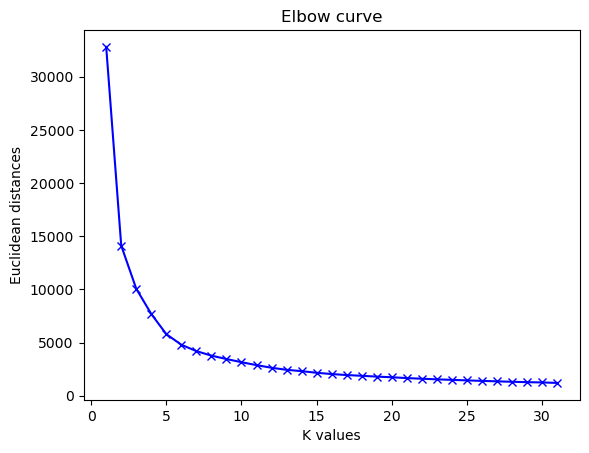

In [20]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
model_k_means = KMeans()
k_values = range(1, 32)
euclidean_distances = []
for k in k_values:
    k_means_model = KMeans(n_clusters=k)
    k_means_model.fit(input_total_res)
    euclidean_distances.append(k_means_model.inertia_)
plt.plot(k_values, euclidean_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Euclidean distances')
plt.title('Elbow curve')
plt.show()

In [21]:
start_train_k_means = t.time()
grid_search_k_means = GridSearchCV(model_k_means, param_grid= {'n_clusters': [2, 3, 4, 5, 6]})
grid_search_k_means.fit(input_total_res)
end_train_k_means = t.time()
training_time_k_means = end_train_k_means - start_train_k_means
predicted_k_means_train = grid_search_k_means.predict(input_total_res)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_k

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
print("Training data")
print('Silhouette score: ', silhouette_score(output_total_res.reshape(-1, 1), predicted_k_means_train.reshape(-1 , 1)))
print('DB index: ', davies_bouldin_score(output_total_res.reshape(-1, 1), predicted_k_means_train.reshape(-1 , 1)))
print('ARI score: ', adjusted_rand_score(output_total_res, predicted_k_means_train))
print('Computational time: ', training_time_k_means, 's')
print(grid_search_k_means.best_params_)

Training data


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette score:  -0.14223466769507975
DB index:  46.89004865230448
ARI score:  0.09388057423610295
Computational time:  35.36829471588135 s
{'n_clusters': 6}


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
predicted_k_means_label = grid_search_k_means.predict(input_final)
input_final['Predicted_Label'] = predicted_k_means_label
print(input_final)

      LocalEnergy_0_1  LocalEnergy_0_3  LocalEnergy_0.7853981633974483_3  \
0            0.206364         1.050212                         -0.787215   
1            0.817664         0.853097                         -0.743263   
2           -0.071022         1.099551                         -0.862340   
3            0.224526         1.041387                         -0.657909   
4           -0.269428         1.007478                         -0.873417   
...               ...              ...                               ...   
4305        -0.143943         0.485807                         -0.269214   
4306        -0.527516         0.948370                         -0.494143   
4307         1.360040         0.929165                         -0.538403   
4308        -0.045703         0.502100                         -0.033262   
4309         0.954250         0.527001                         -0.221823   

      LocalEnergy_1.5707963267948966_2  MeanAmplitude_1.5707963267948966_1  \
0        

In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from itertools import product
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['complete', 'average', 'single'],
    'affinity': ['euclidean', 'manhattan', 'cosine']
}
start_train_agglo = t.time()
best_score_agglo = -1
best_params_agglo = {} 
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    agg_cluster = AgglomerativeClustering(**param_dict)
    labels = agg_cluster.fit_predict(input_total_res)
    score = silhouette_score(output_total_res.reshape(-1, 1), labels)
    print(f"Parameters: {param_dict}, Silhouette Score: {score}")
    if score > best_score_agglo:
        best_score_agglo = score
        best_params_agglo = param_dict

best_agg_cluster = AgglomerativeClustering(**best_params_agglo)
labels = best_agg_cluster.fit_predict(input_total_res)
end_train_agglo = t.time()
adjusted_rand_score_agglo = adjusted_rand_score(output_total_res, labels)
training_time_agglomerative = end_train_agglo - start_train_agglo

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'complete', 'affinity': 'euclidean'}, Silhouette Score: 0.09045778368162945


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'complete', 'affinity': 'manhattan'}, Silhouette Score: 0.09045778368162945


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'complete', 'affinity': 'cosine'}, Silhouette Score: 0.16518653106228048


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'average', 'affinity': 'euclidean'}, Silhouette Score: -0.05340993839112703


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'average', 'affinity': 'manhattan'}, Silhouette Score: 0.01082177190191173


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'average', 'affinity': 'cosine'}, Silhouette Score: 0.16518653106228048


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'single', 'affinity': 'euclidean'}, Silhouette Score: -0.054514235168061705


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'single', 'affinity': 'manhattan'}, Silhouette Score: 0.16518653106228048


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'single', 'affinity': 'cosine'}, Silhouette Score: 0.16518653106228048


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'complete', 'affinity': 'euclidean'}, Silhouette Score: -0.15964396566394112


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'complete', 'affinity': 'manhattan'}, Silhouette Score: -0.2056761783129518


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'complete', 'affinity': 'cosine'}, Silhouette Score: -0.0342648596362691


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'average', 'affinity': 'euclidean'}, Silhouette Score: -0.054379400339745546


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'average', 'affinity': 'manhattan'}, Silhouette Score: -0.13554424336287546


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'average', 'affinity': 'cosine'}, Silhouette Score: -0.038413878592638874


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'single', 'affinity': 'euclidean'}, Silhouette Score: -0.16489278611411468


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'single', 'affinity': 'manhattan'}, Silhouette Score: -0.16489278611411468


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'single', 'affinity': 'cosine'}, Silhouette Score: -0.3519078169982388


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'complete', 'affinity': 'euclidean'}, Silhouette Score: -0.24930173660072727


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'complete', 'affinity': 'manhattan'}, Silhouette Score: -0.19008567615123556


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'complete', 'affinity': 'cosine'}, Silhouette Score: -0.08943704965442142


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'average', 'affinity': 'euclidean'}, Silhouette Score: -0.25058013692932257


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'average', 'affinity': 'manhattan'}, Silhouette Score: -0.16257002726208436


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'average', 'affinity': 'cosine'}, Silhouette Score: -0.12996055221538946


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'single', 'affinity': 'euclidean'}, Silhouette Score: -0.16537751708842394


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'single', 'affinity': 'manhattan'}, Silhouette Score: -0.16537751708842394


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'single', 'affinity': 'cosine'}, Silhouette Score: -0.3517458298425374


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'complete', 'affinity': 'euclidean'}, Silhouette Score: -0.3701884909251723


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'complete', 'affinity': 'manhattan'}, Silhouette Score: -0.22030039846686636


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'complete', 'affinity': 'cosine'}, Silhouette Score: -0.11350591616887605


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'average', 'affinity': 'euclidean'}, Silhouette Score: -0.3239356768164337


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'average', 'affinity': 'manhattan'}, Silhouette Score: -0.2639345147423297


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'average', 'affinity': 'cosine'}, Silhouette Score: -0.1768793343922875


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'single', 'affinity': 'euclidean'}, Silhouette Score: -0.16472077980048863


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'single', 'affinity': 'manhattan'}, Silhouette Score: -0.16472077980048863


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'single', 'affinity': 'cosine'}, Silhouette Score: -0.3515838424360576


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [25]:
print("\nBest Parameters: ", best_params_agglo)
print("Best Silhouette Score: ", best_score_agglo)
print('Best adjusted rand score: ', adjusted_rand_score_agglo)
print('Computational time: ', training_time_agglomerative, 's')


Best Parameters:  {'n_clusters': 2, 'linkage': 'complete', 'affinity': 'cosine'}
Best Silhouette Score:  0.16518653106228048
Best adjusted rand score:  0.09253972164623804
Computational time:  118.76537775993347 s


In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
param_grid = {
    'min_samples': [2, 3, 4, 5, 6, 7],
    'metric': ['euclidean', 'l1', 'l2', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
start_train_dbscan = t.time()
best_score_dbscan = -1
best_params_dbscan = {}
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    dbscan_cluster = DBSCAN(**param_dict)
    labels = dbscan_cluster.fit_predict(input_total_res)
    score = silhouette_score(output_total_res.reshape(-1, 1), labels)
    print(f"Parameters: {param_dict}, Silhouette Score: {score}")
    if score > best_score_dbscan:
        best_score_dbscan = score
        best_params_dbscan = param_dict

best_dbscan_cluster = DBSCAN(**best_params_dbscan)
labels = best_dbscan_cluster.fit_predict(input_total_res)
end_train_dbscan = t.time()
adjusted_rand_score_dbscan = adjusted_rand_score(output_total_res, labels)
training_time_dbscan = end_train_dbscan - start_train_dbscan

Parameters: {'min_samples': 2, 'metric': 'euclidean', 'algorithm': 'auto'}, Silhouette Score: -0.9953142672483438
Parameters: {'min_samples': 2, 'metric': 'euclidean', 'algorithm': 'ball_tree'}, Silhouette Score: -0.9953142672483438
Parameters: {'min_samples': 2, 'metric': 'euclidean', 'algorithm': 'kd_tree'}, Silhouette Score: -0.9953142672483438
Parameters: {'min_samples': 2, 'metric': 'euclidean', 'algorithm': 'brute'}, Silhouette Score: -0.9953142672483438
Parameters: {'min_samples': 2, 'metric': 'l1', 'algorithm': 'auto'}, Silhouette Score: -0.9827112619163031
Parameters: {'min_samples': 2, 'metric': 'l1', 'algorithm': 'ball_tree'}, Silhouette Score: -0.9827112619163031
Parameters: {'min_samples': 2, 'metric': 'l1', 'algorithm': 'kd_tree'}, Silhouette Score: -0.9827112619163031
Parameters: {'min_samples': 2, 'metric': 'l1', 'algorithm': 'brute'}, Silhouette Score: -0.9827112619163031
Parameters: {'min_samples': 2, 'metric': 'l2', 'algorithm': 'auto'}, Silhouette Score: -0.99531426

Parameters: {'min_samples': 6, 'metric': 'l2', 'algorithm': 'ball_tree'}, Silhouette Score: -0.10561368955794627
Parameters: {'min_samples': 6, 'metric': 'l2', 'algorithm': 'kd_tree'}, Silhouette Score: -0.10561368955794627
Parameters: {'min_samples': 6, 'metric': 'l2', 'algorithm': 'brute'}, Silhouette Score: -0.10561368955794627
Parameters: {'min_samples': 6, 'metric': 'manhattan', 'algorithm': 'auto'}, Silhouette Score: -0.9633313622512
Parameters: {'min_samples': 6, 'metric': 'manhattan', 'algorithm': 'ball_tree'}, Silhouette Score: -0.9633313622512
Parameters: {'min_samples': 6, 'metric': 'manhattan', 'algorithm': 'kd_tree'}, Silhouette Score: -0.9633313622512
Parameters: {'min_samples': 6, 'metric': 'manhattan', 'algorithm': 'brute'}, Silhouette Score: -0.9633313622512
Parameters: {'min_samples': 7, 'metric': 'euclidean', 'algorithm': 'auto'}, Silhouette Score: -0.1038670723177975
Parameters: {'min_samples': 7, 'metric': 'euclidean', 'algorithm': 'ball_tree'}, Silhouette Score: -

In [27]:
print("\nBest Parameters: ", best_params_dbscan)
print("Best Silhouette Score: ", best_score_dbscan)
print('Best ARI score: ', adjusted_rand_score_dbscan)
print('Computational time: ', training_time_dbscan, 's')


Best Parameters:  {'min_samples': 7, 'metric': 'euclidean', 'algorithm': 'auto'}
Best Silhouette Score:  -0.1038670723177975
Best ARI score:  0.09697365633893092
Computational time:  159.59954738616943 s


In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from itertools import product

param_grid = {
    'max_iter': [100, 200, 300, 400, 500],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'n_components': [2, 3, 4, 5, 6],
    'init_params': ['kmeans', 'k-means++', 'random', 'random_from_data']
}

start_train_gmm = t.time()
best_score_gmm = -1
best_params_gmm = {}

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    gmm_cluster = GaussianMixture(**param_dict)
    labels = gmm_cluster.fit_predict(input_total_res)
    score = silhouette_score(output_total_res.reshape(-1, 1), labels)
    print(f"Parameters: {param_dict}, Silhouette Score: {score}") 
    if score > best_score_gmm:
        best_score_gmm = score
        best_params_gmm = param_dict

best_gmm_cluster = GaussianMixture(**best_params_gmm)
labels = best_gmm_cluster.fit_predict(input_total_res)
end_train_gmm = t.time()
adjusted_rand_score_gmm = adjusted_rand_score(output_total_res, labels)
training_time_gmm = end_train_gmm - start_train_gmm

Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 2, 'init_params': 'kmeans'}, Silhouette Score: 0.16518653106228048
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 2, 'init_params': 'k-means++'}, Silhouette Score: 0.16518653106228048
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 2, 'init_params': 'random'}, Silhouette Score: 0.16518653106228048
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 2, 'init_params': 'random_from_data'}, Silhouette Score: 0.16518653106228048
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 3, 'init_params': 'kmeans'}, Silhouette Score: 0.00248037497189055
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 3, 'init_params': 'k-means++'}, Silhouette Score: -0.029381675323673643
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 3, 'init_params': 'random'}, Silhouette Score: -0.016898623525432418


Parameters: {'max_iter': 100, 'covariance_type': 'diag', 'n_components': 6, 'init_params': 'k-means++'}, Silhouette Score: -0.13668270871917548
Parameters: {'max_iter': 100, 'covariance_type': 'diag', 'n_components': 6, 'init_params': 'random'}, Silhouette Score: -0.16814759765563853
Parameters: {'max_iter': 100, 'covariance_type': 'diag', 'n_components': 6, 'init_params': 'random_from_data'}, Silhouette Score: -0.11444085901822644
Parameters: {'max_iter': 100, 'covariance_type': 'spherical', 'n_components': 2, 'init_params': 'kmeans'}, Silhouette Score: 0.1698588678507356
Parameters: {'max_iter': 100, 'covariance_type': 'spherical', 'n_components': 2, 'init_params': 'k-means++'}, Silhouette Score: 0.1698588678507356
Parameters: {'max_iter': 100, 'covariance_type': 'spherical', 'n_components': 2, 'init_params': 'random'}, Silhouette Score: 0.1698588678507356
Parameters: {'max_iter': 100, 'covariance_type': 'spherical', 'n_components': 2, 'init_params': 'random_from_data'}, Silhouette S

Parameters: {'max_iter': 200, 'covariance_type': 'tied', 'n_components': 5, 'init_params': 'random'}, Silhouette Score: -0.0949137644628848
Parameters: {'max_iter': 200, 'covariance_type': 'tied', 'n_components': 5, 'init_params': 'random_from_data'}, Silhouette Score: -0.2031436712395075
Parameters: {'max_iter': 200, 'covariance_type': 'tied', 'n_components': 6, 'init_params': 'kmeans'}, Silhouette Score: -0.32439758700096
Parameters: {'max_iter': 200, 'covariance_type': 'tied', 'n_components': 6, 'init_params': 'k-means++'}, Silhouette Score: -0.20439196701104165
Parameters: {'max_iter': 200, 'covariance_type': 'tied', 'n_components': 6, 'init_params': 'random'}, Silhouette Score: -0.1390157788827008
Parameters: {'max_iter': 200, 'covariance_type': 'tied', 'n_components': 6, 'init_params': 'random_from_data'}, Silhouette Score: -0.1439715534541437
Parameters: {'max_iter': 200, 'covariance_type': 'diag', 'n_components': 2, 'init_params': 'kmeans'}, Silhouette Score: 0.1651865310622804

Parameters: {'max_iter': 300, 'covariance_type': 'full', 'n_components': 4, 'init_params': 'random_from_data'}, Silhouette Score: -0.07757363896982163
Parameters: {'max_iter': 300, 'covariance_type': 'full', 'n_components': 5, 'init_params': 'kmeans'}, Silhouette Score: -0.08644855931171412
Parameters: {'max_iter': 300, 'covariance_type': 'full', 'n_components': 5, 'init_params': 'k-means++'}, Silhouette Score: -0.11452541701477324
Parameters: {'max_iter': 300, 'covariance_type': 'full', 'n_components': 5, 'init_params': 'random'}, Silhouette Score: -0.1531482114908
Parameters: {'max_iter': 300, 'covariance_type': 'full', 'n_components': 5, 'init_params': 'random_from_data'}, Silhouette Score: -0.1347093191566186
Parameters: {'max_iter': 300, 'covariance_type': 'full', 'n_components': 6, 'init_params': 'kmeans'}, Silhouette Score: -0.19840184197002453
Parameters: {'max_iter': 300, 'covariance_type': 'full', 'n_components': 6, 'init_params': 'k-means++'}, Silhouette Score: -0.2208964906

Parameters: {'max_iter': 300, 'covariance_type': 'spherical', 'n_components': 4, 'init_params': 'kmeans'}, Silhouette Score: -0.16763913509648443
Parameters: {'max_iter': 300, 'covariance_type': 'spherical', 'n_components': 4, 'init_params': 'k-means++'}, Silhouette Score: -0.08305933864830553
Parameters: {'max_iter': 300, 'covariance_type': 'spherical', 'n_components': 4, 'init_params': 'random'}, Silhouette Score: -0.09068958043417973
Parameters: {'max_iter': 300, 'covariance_type': 'spherical', 'n_components': 4, 'init_params': 'random_from_data'}, Silhouette Score: -0.08886902505785861
Parameters: {'max_iter': 300, 'covariance_type': 'spherical', 'n_components': 5, 'init_params': 'kmeans'}, Silhouette Score: -0.16407362508132142
Parameters: {'max_iter': 300, 'covariance_type': 'spherical', 'n_components': 5, 'init_params': 'k-means++'}, Silhouette Score: -0.1636830507400614
Parameters: {'max_iter': 300, 'covariance_type': 'spherical', 'n_components': 5, 'init_params': 'random'}, Si

Parameters: {'max_iter': 400, 'covariance_type': 'diag', 'n_components': 3, 'init_params': 'k-means++'}, Silhouette Score: -0.00583972465229707
Parameters: {'max_iter': 400, 'covariance_type': 'diag', 'n_components': 3, 'init_params': 'random'}, Silhouette Score: -0.006740242436856722
Parameters: {'max_iter': 400, 'covariance_type': 'diag', 'n_components': 3, 'init_params': 'random_from_data'}, Silhouette Score: -0.005513049060846283
Parameters: {'max_iter': 400, 'covariance_type': 'diag', 'n_components': 4, 'init_params': 'kmeans'}, Silhouette Score: -0.09661295818216598
Parameters: {'max_iter': 400, 'covariance_type': 'diag', 'n_components': 4, 'init_params': 'k-means++'}, Silhouette Score: -0.09684105042445056
Parameters: {'max_iter': 400, 'covariance_type': 'diag', 'n_components': 4, 'init_params': 'random'}, Silhouette Score: -0.09790193146534551
Parameters: {'max_iter': 400, 'covariance_type': 'diag', 'n_components': 4, 'init_params': 'random_from_data'}, Silhouette Score: -0.096

Parameters: {'max_iter': 500, 'covariance_type': 'tied', 'n_components': 2, 'init_params': 'random'}, Silhouette Score: 0.10615583566197512
Parameters: {'max_iter': 500, 'covariance_type': 'tied', 'n_components': 2, 'init_params': 'random_from_data'}, Silhouette Score: -0.05458953932299492
Parameters: {'max_iter': 500, 'covariance_type': 'tied', 'n_components': 3, 'init_params': 'kmeans'}, Silhouette Score: 0.04012720751921996
Parameters: {'max_iter': 500, 'covariance_type': 'tied', 'n_components': 3, 'init_params': 'k-means++'}, Silhouette Score: -0.04519741230009928
Parameters: {'max_iter': 500, 'covariance_type': 'tied', 'n_components': 3, 'init_params': 'random'}, Silhouette Score: -0.0616781884376139
Parameters: {'max_iter': 500, 'covariance_type': 'tied', 'n_components': 3, 'init_params': 'random_from_data'}, Silhouette Score: -0.048484100378008
Parameters: {'max_iter': 500, 'covariance_type': 'tied', 'n_components': 4, 'init_params': 'kmeans'}, Silhouette Score: -0.1519221890493

Parameters: {'max_iter': 500, 'covariance_type': 'spherical', 'n_components': 6, 'init_params': 'random_from_data'}, Silhouette Score: -0.3906336980771646


In [29]:
print("\nBest Parameters: ", best_params_gmm)
print("Best Silhouette Score: ", best_score_gmm)
print('Best ARI score: ', adjusted_rand_score_gmm)
print('Computational time: ', training_time_gmm, 's')


Best Parameters:  {'max_iter': 100, 'covariance_type': 'spherical', 'n_components': 2, 'init_params': 'kmeans'}
Best Silhouette Score:  0.1698588678507356
Best ARI score:  0.0874569546571926
Computational time:  560.1567215919495 s
